In [31]:
from estym import *
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

In [32]:
def comparison(robust_acf_estimator, discrete_noise, *args):
    ar4 = np.array([1, 0.33, 0.5, 0.86, 0.34])
    ma4 = np.array([1, 0.9, 0.3, 0.12, 0.94])
    Y = ArmaProcess(ar4, ma4).generate_sample(nsample=100)
    if discrete_noise:
        Y = np.array(Y) + Zt(0.03, 100, 100)
    simple_acf = autocorr(Y, [0, 20])
    if args:
        robust_acf = robust_acf_estimator(Y, [0, 20], *args)
    else:
        robust_acf = robust_acf_estimator(Y, [0, 20])
    fig = plt.figure(figsize=(20, 8))
    ax1 = plt.subplot2grid((2, 2), (0, 0))
    ax2 = plt.subplot2grid((2, 2), (1, 0))
    ax3 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    for i in range(len(simple_acf)):
        ax1.plot([i, i], [0, simple_acf[i]], 'g')
        ax1.scatter(i, simple_acf[i], c='green')
        ax2.plot([i, i], [0, robust_acf[i]], 'r')
        ax2.scatter(i, robust_acf[i], c='red')
        ax3.plot([i, i], [0, simple_acf[i]], 'g')
        ax3.plot([i, i], [0, robust_acf[i]], 'r')
        ax3.scatter(i, robust_acf[i], c='red')
        ax3.scatter(i, simple_acf[i], c='green')
    ax1.set_title("Zwykły ACF")
    ax2.set_title("Robustowy ACF")
    ax3.set_title("Porównanie")
    ax3.legend(("Zwykły", "Robustowy"))
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    fig.tight_layout()

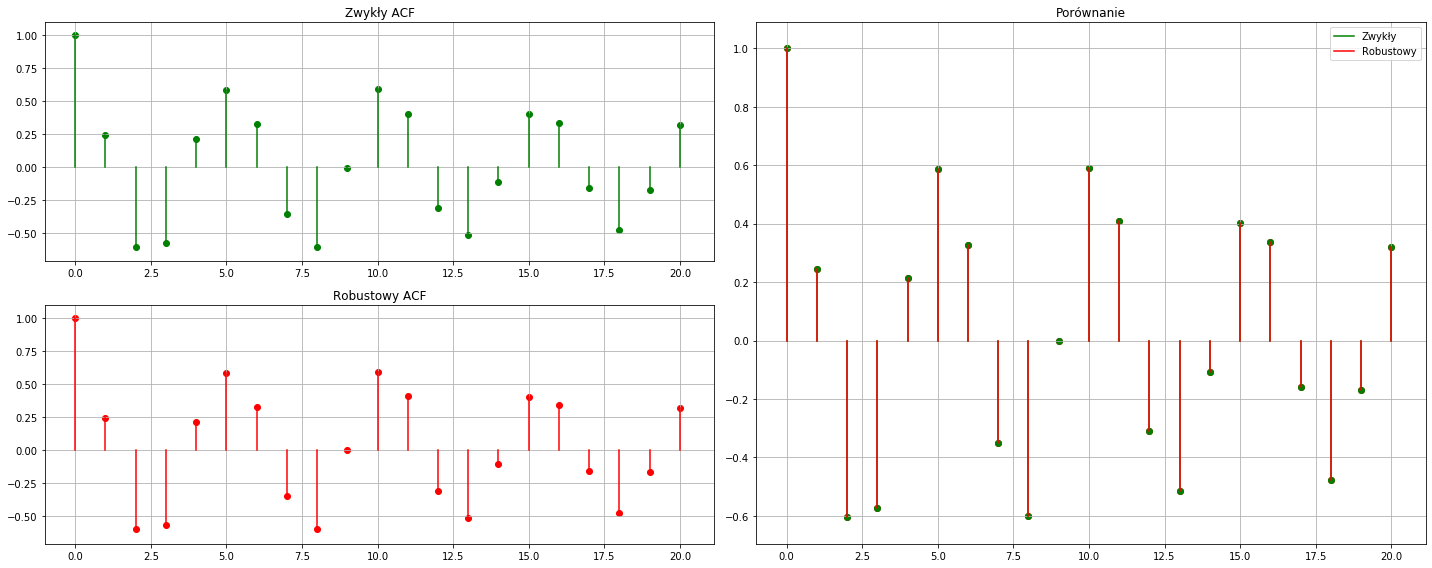

In [33]:
comparison(autocorr, False)

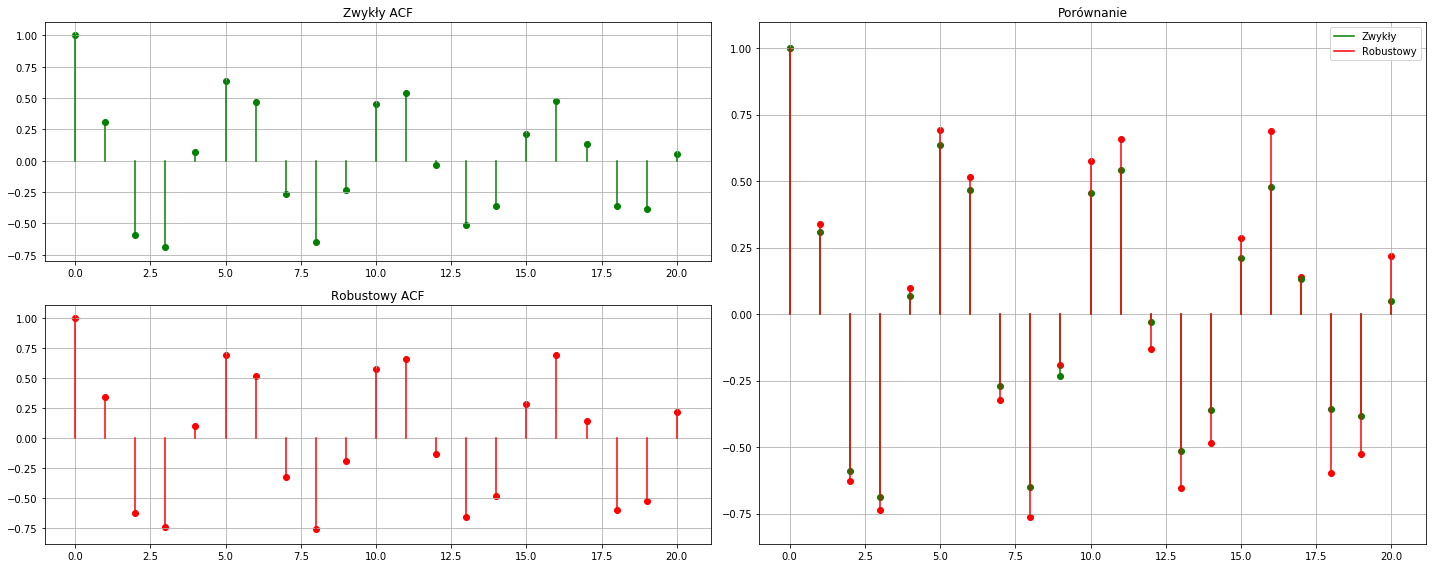

In [34]:
comparison(autocorr1, False, 2.2191)

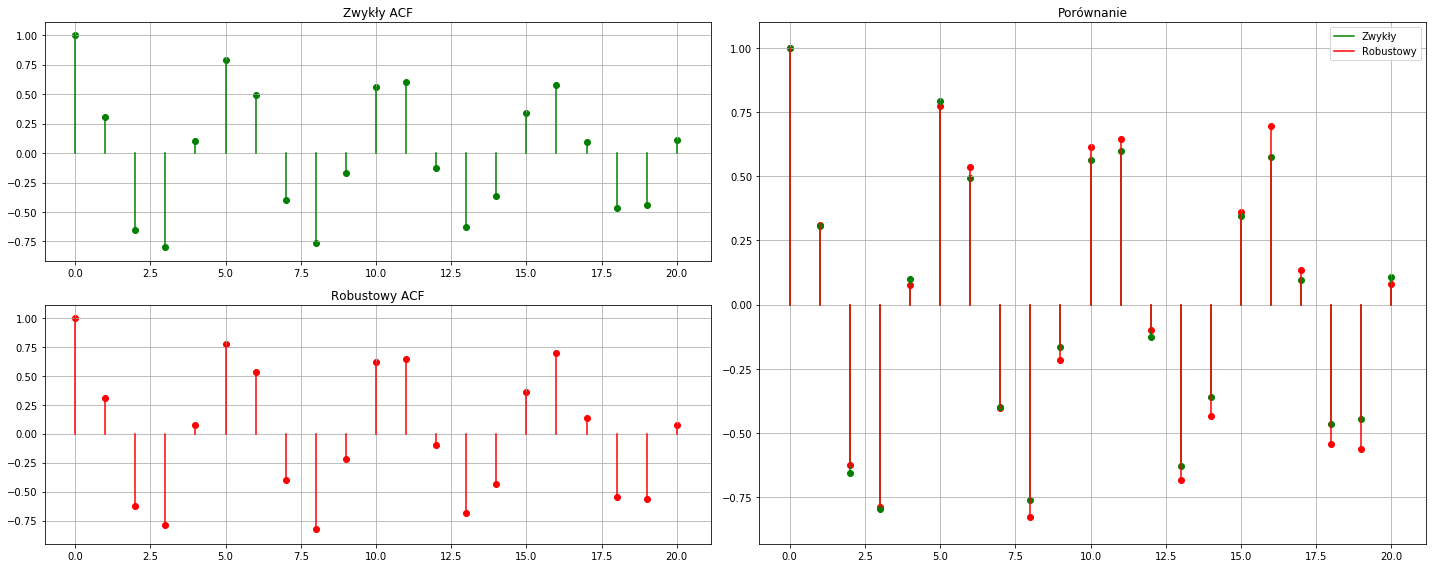

In [35]:
comparison(autocorr2, False, 0.015)

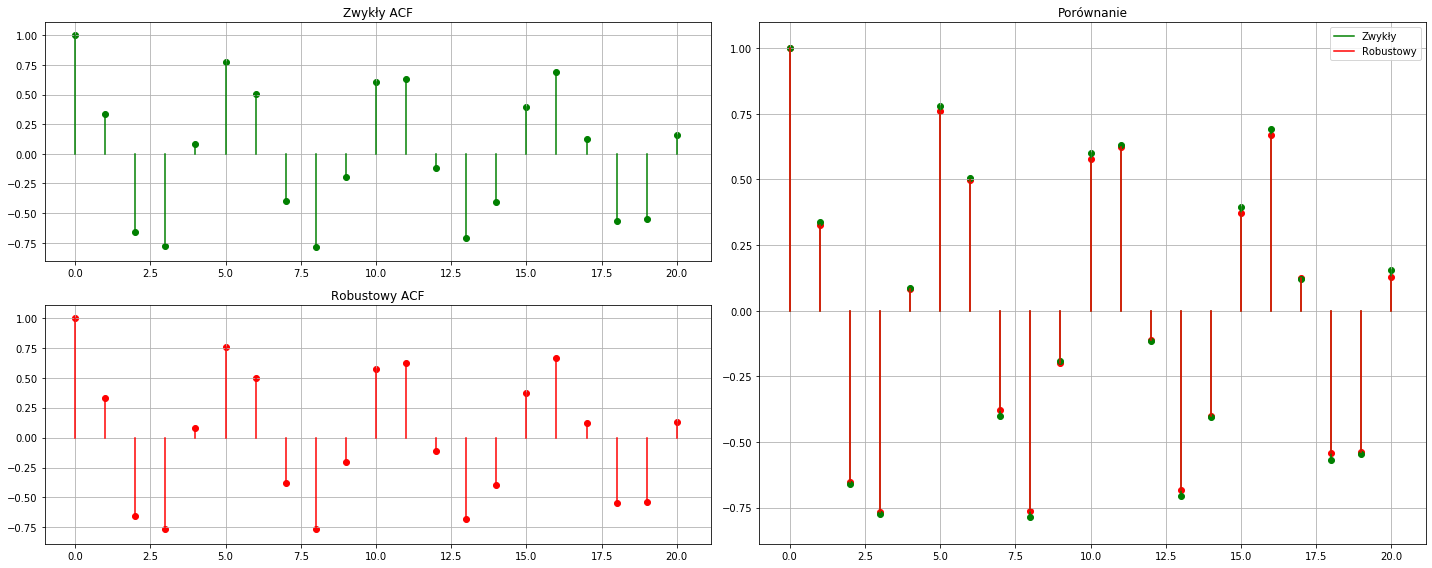

In [36]:
comparison(autocorr3, False)

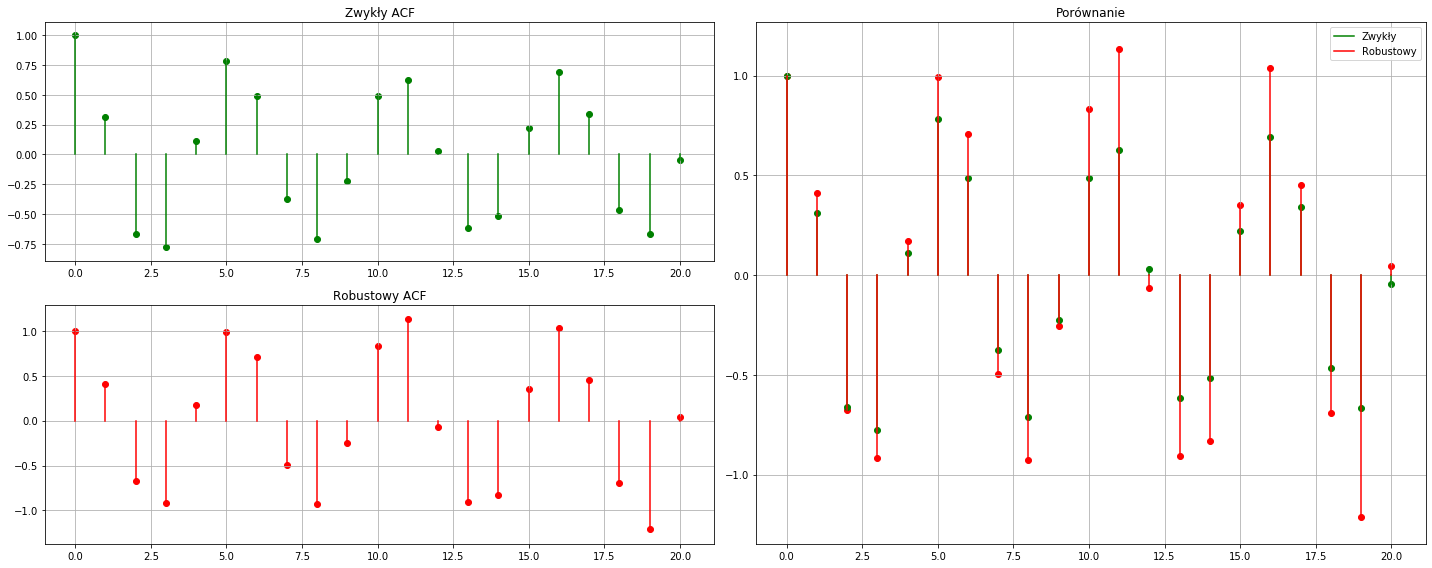

In [37]:
comparison(autocorr4, False)

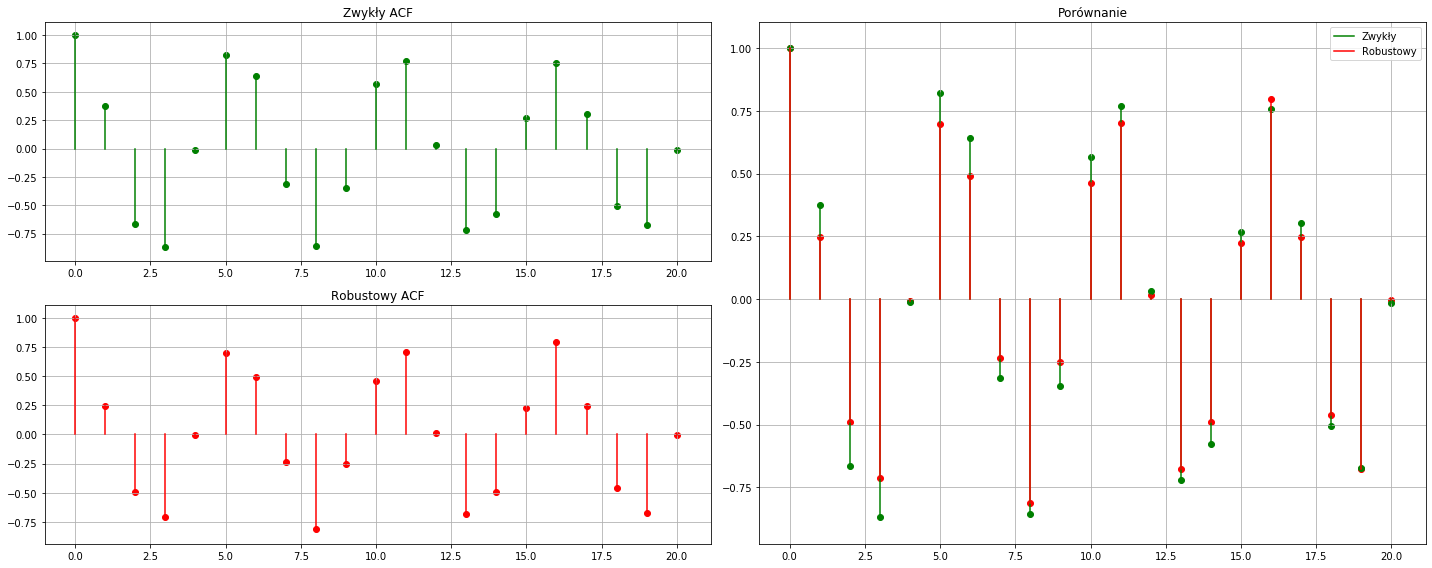

In [38]:
comparison(autocorr5, False)

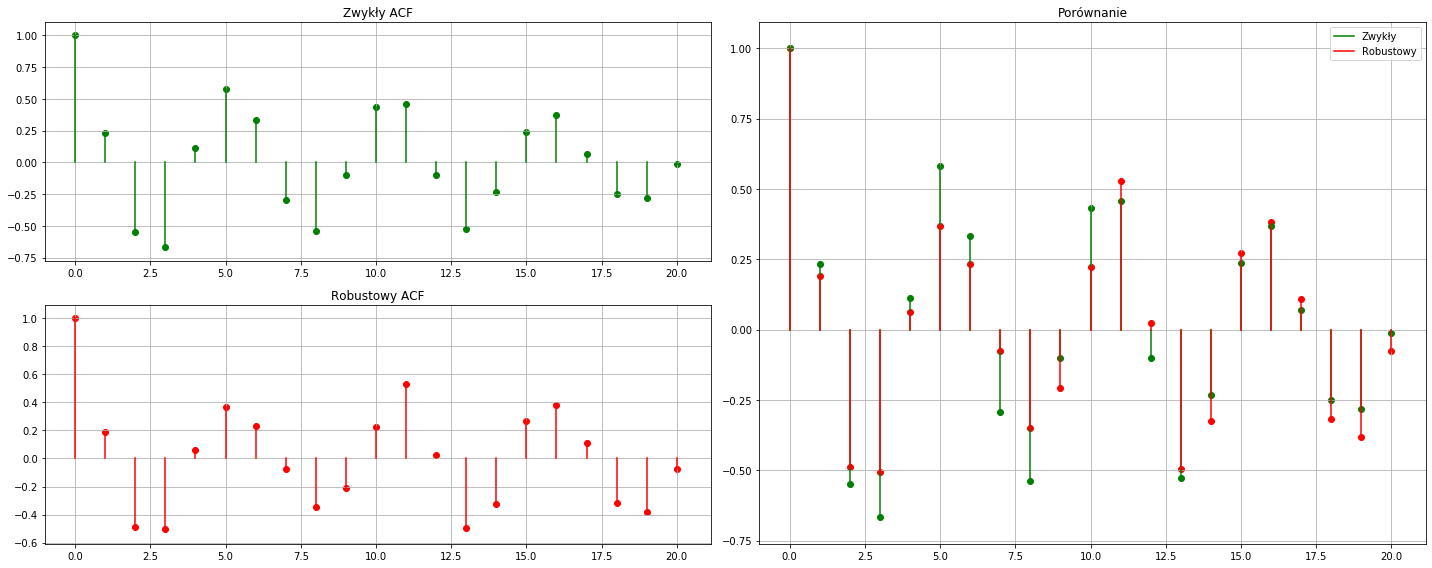

In [39]:
comparison(autocorr6, False)

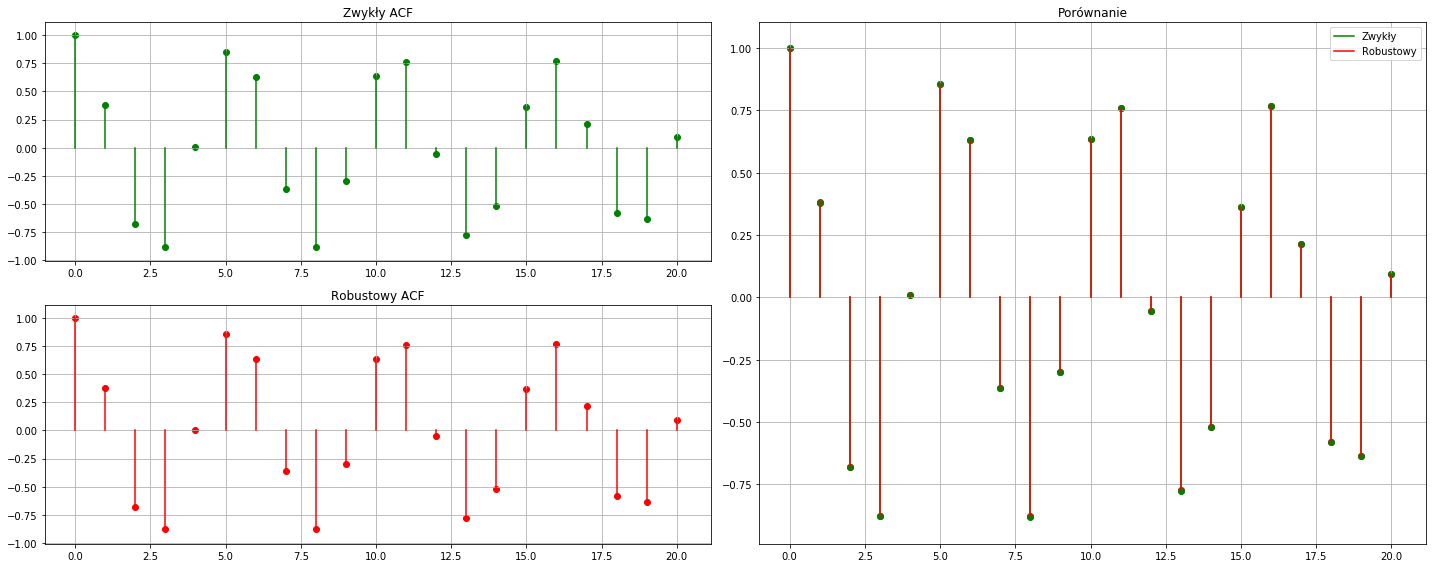

In [40]:
comparison(autocorr7, False)

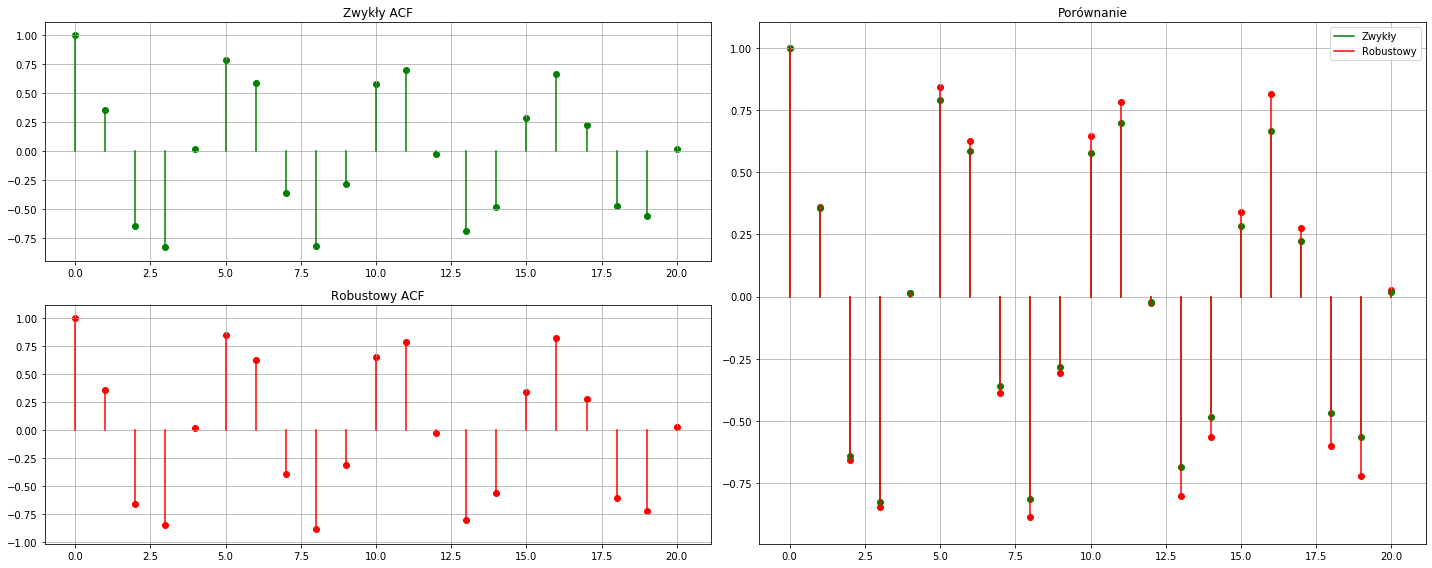

In [41]:
comparison(autocorr8, False)

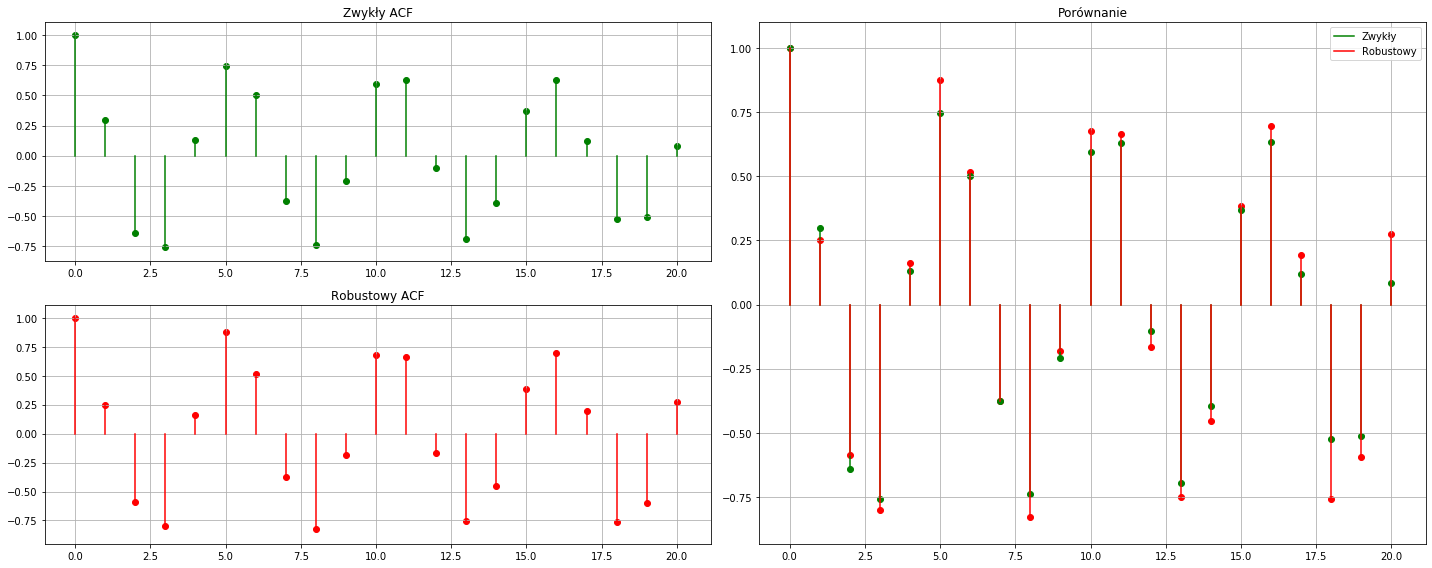

In [42]:
comparison(autocorr9, False)

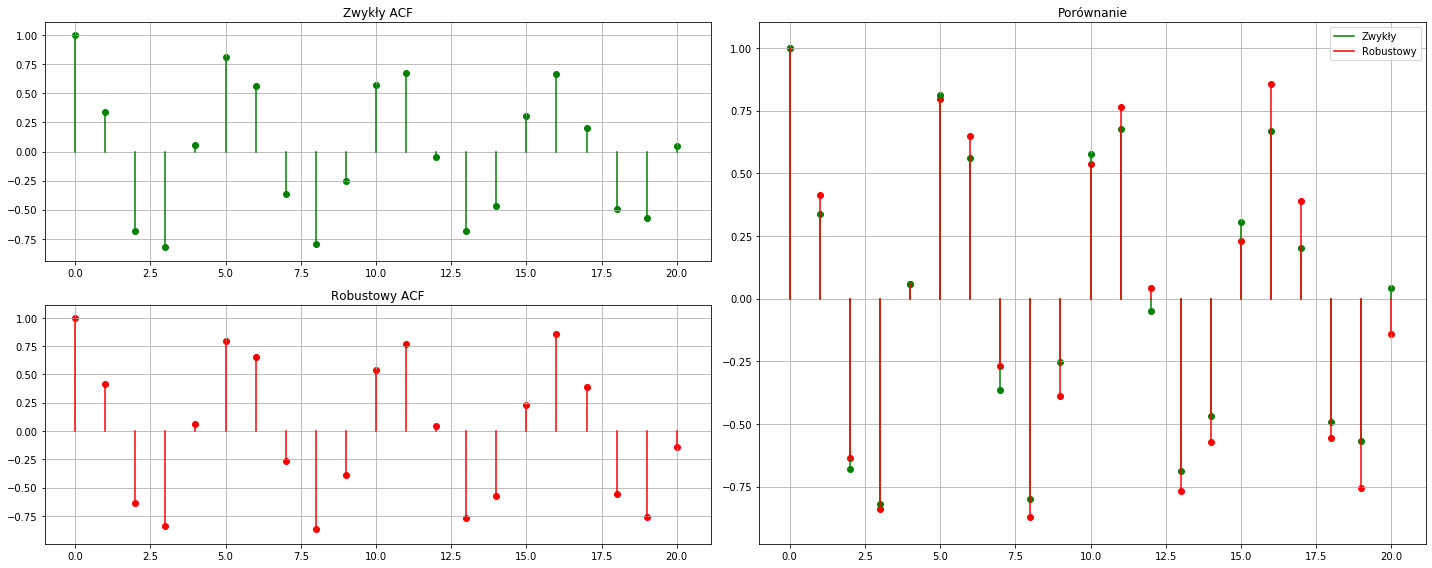

In [43]:
comparison(autocorr10, False)